### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read The Dataset

In [2]:
data = pd.read_csv('customer_churn.csv')
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
# checking if any null values present
data.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
data = data.dropna() # drops null values

In [6]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

### Visualization

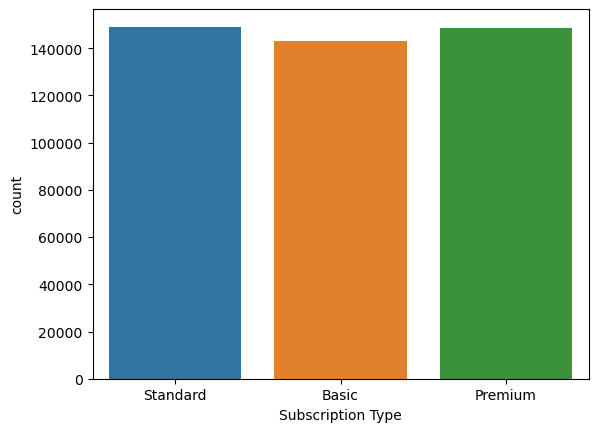

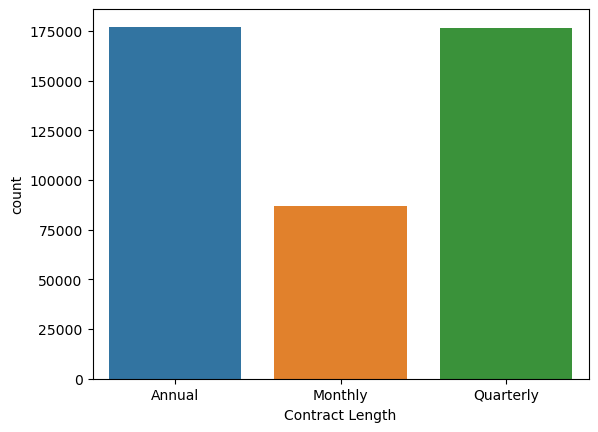

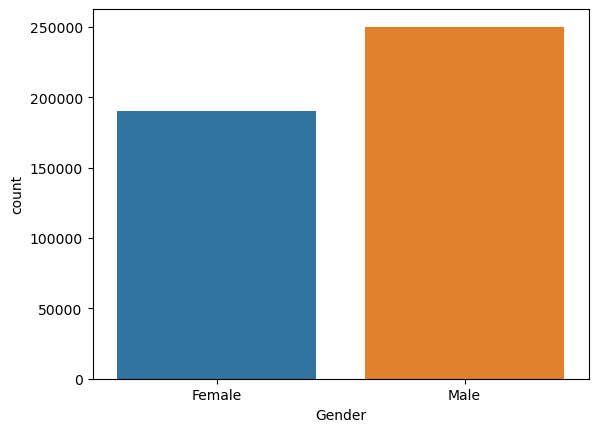

In [7]:
columns=['Subscription Type','Contract Length','Gender']
for cols in columns:
    sns.countplot(data=data,x=cols)
    plt.show()

### Data Preprocessing

In [8]:
le = LabelEncoder()
for cols in data.select_dtypes('object').columns:
    data[
    cols] = le.fit_transform(data[cols])

In [9]:
data.head(2)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0


In [10]:
# separate features and target variables
X = data.drop(['Churn','CustomerID'],axis =1)
y=data['Churn']

In [11]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0


In [12]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440832, dtype: float64

In [13]:
X.shape,y.shape

((440832, 10), (440832,))

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape,y_train.shape

((352665, 10), (352665,))

In [16]:
X_test.shape,y_test.shape

((88167, 10), (88167,))

## Steps To Train Models:
- Create
- Fit
- Predict
- Evaluate Metrics

### LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Accuracy =',accuracy_score(y_pred>0.5,y_test))
print(classification_report(y_pred>0.5,y_test))

Accuracy = 0.8524731475495366
              precision    recall  f1-score   support

       False       0.90      0.79      0.84     43318
        True       0.82      0.91      0.86     44849

    accuracy                           0.85     88167
   macro avg       0.86      0.85      0.85     88167
weighted avg       0.86      0.85      0.85     88167



### RandomForestClassifier

In [18]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy =',accuracy_score(y_pred>0.5,y_test))
print(classification_report(y_pred>0.5,y_test))

Accuracy = 0.9997731577574376
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     38079
        True       1.00      1.00      1.00     50088

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



### DecisionTreeRegressor

In [20]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)
print('Accuracy =',accuracy_score(y_pred>0.5,y_test))
print(classification_report(y_pred>0.5,y_test))

Accuracy = 0.9998412104302064
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     38073
        True       1.00      1.00      1.00     50094

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

